## Forward Pass

In [1]:
import os
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def estimateLogit(util, av, choice, modelName, database):
    """
    A function to avoid duplicated files when
    estimating Logit Models using Biogeme.
    It assumes that you want to save the output
    files on a subfolder in the current directory.
    """
    folder, name = modelName.split('/')
    if (name + '.pickle') in os.listdir(folder):
        os.remove(modelName + '.pickle')
    if (name + '.html') in os.listdir(folder):
        os.remove(modelName + '.html')
    logprob = bioLogLogit(V,av,CHOSEN)
    biogeme  = bio.BIOGEME(database,logprob)
    biogeme.modelName = modelName
    return biogeme.estimate()

In [2]:
data = pd.read_csv('data/Data_HW_001.txt', sep='\t')
data['HIGH_INCOME'] = data['INCOME'].apply(lambda inc: int(inc == 3))
data['MEDIUM_INCOME'] = data['INCOME'].apply(lambda inc: int(inc == 2))
data['POPDENSE'] = data['POPDENSE'] / data['POPDENSE'].max()
database = db.Database('Data_HW_001', data)
from headers import * 

In [3]:
ASC_YES = Beta('ASC_YES', 0, None, None, 0)
ASC_NO = Beta('ASC_NO', 0, None, None, 1)
BETA_INCOME = Beta('BETA_INCOME', 0, None, None, 0)
BETA_HHSIZE = Beta('BETA_HHSIZE', 0, None, None, 0)
BETA_NUMVEH = Beta('BETA_NUMVEH', 0, None, None, 0)
BETA_WOMEN = Beta('BETA_WOMEN', 0, None, None, 0)
BETA_MEN = Beta('BETA_MEN', 0, None, None, 0)
BETA_NWORK = Beta('BETA_NWORK', 0, None, None, 0)
BETA_NCHILD = Beta('BETA_NCHILD', 0, None, None, 0)
BETA_NYCHILD = Beta('BETA_NYCHILD', 0, None, None, 0)
BETA_ETHN = Beta('BETA_ETHN', 0, None, None, 0)
BETA_DIST = Beta('BETA_DIST', 0, None, None, 0)
BETA_NBIKES = Beta('BETA_NBIKES', 0, None, None, 0)
BETA_PTRANSP = Beta('BETA_PTRANSP', 0, None, None, 0)
BETA_SOLARPAN = Beta('BETA_SOLARPAN', 0, None, None, 0)
BETA_WALKBIKE = Beta('BETA_WALKBIKE', 0, None, None, 0)
BETA_TELECO = Beta('BETA_TELECO', 0, None, None, 0)
BETA_PSENIORS = Beta('BETA_PSENIORS', 0, None, None, 0)
BETA_GRAD = Beta('BETA_GRAD', 0, None, None, 0)
BETA_POPDENSE = Beta('BETA_POPDENSE', 0, None, None, 0)
BETA_NEIGHB = Beta('BETA_NEIGHB', 0, None, None, 0)
BETA_SMARTPH = Beta('BETA_SMARTPH', 0, None, None, 0)
BETA_SPOOL = Beta('BETA_SPOOL', 0, None, None, 0)
BETA_CABLE = Beta('BETA_CABLE', 0, None, None, 0)
BETA_COST = Beta('BETA_COST', 0, None,None, 0)
BETA_HIGH_INC_COST = Beta('BETA_HIGH_INC_COST', 0, None, None, 0)
BETA_MEDIUM_INC_COST = Beta('BETA_HIGH_MEDIUM_COST', 0, None, None, 0)
YES = DefineVariable('YES', (HHID != 0), database)
NO = DefineVariable('NO', (HHID != 0), database)
av = {1: YES, 2: NO}

# Constant Model

In [4]:
V1 = ASC_YES
V2 = ASC_NO
V = {1: V1, 2: V2}

In [5]:
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
print('Constant model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

Constant model rho-square-bar:  0.3651705552042527


## HHSIZE or WOMEN & MEN

In [6]:
V1 = ASC_YES + BETA_HHSIZE * HHSIZE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('HHSIZE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.825006,0.100627,-18.136289,0.00000,0.100616,-18.138416,0.000000
BETA_HHSIZE,0.063454,0.032167,1.972613,0.04854,0.032159,1.973131,0.048481


HHSIZE model rho-square-bar:  0.36564216814781014


In [7]:
V1 = ASC_YES  + BETA_WOMEN * WOMEN + BETA_MEN * MEN
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('WOMEN and MEN model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.820852,0.100805,-18.063068,0.000000,0.100859,-18.053444,0.000000
BETA_MEN,0.004692,0.043354,0.108233,0.913811,0.042542,0.110298,0.912173
BETA_WOMEN,0.115429,0.040033,2.883383,0.003934,0.039870,2.895129,0.003790


WOMEN and MEN model rho-square-bar:  0.36627728886366717


In [8]:
V1 = ASC_YES + BETA_WOMEN * WOMEN
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('WOMEN model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.813699,0.076056,-23.846840,0.000000,0.075582,-23.996582,0.000000
BETA_WOMEN,0.114555,0.039205,2.921951,0.003478,0.038821,2.950860,0.003169


WOMEN model rho-square-bar:  0.366794118260543


In [9]:
ALONE = DefineVariable('ALONE', (HHSIZE <= 1), database)
BETA_ALONE = Beta('BETA_ALONE', 0, None, None, 0)

In [10]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_ALONE * ALONE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('ALONE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.764035,0.098382,-17.930394,0.000000,0.096967,-18.192073,0.000000
BETA_ALONE,-0.100674,0.128261,-0.784915,0.432504,0.127115,-0.791989,0.428367
BETA_WOMEN,0.099637,0.043580,2.286277,0.022238,0.042904,2.322332,0.020215


ALONE model rho-square-bar:  0.366435388709735


### NUMVEH

In [11]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_HHSIZE * HHSIZE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('HHSIZE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.820895,0.100805,-18.063516,0.000000,0.100859,-18.053914,0.000000
BETA_HHSIZE,0.004730,0.043353,0.109108,0.913117,0.042540,0.111192,0.911464
BETA_WOMEN,0.110701,0.052689,2.101028,0.035638,0.051108,2.166021,0.030310


HHSIZE model rho-square-bar:  0.36627728882270805


### NWORK

In [12]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_NWORK * NWORK
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('NWORK model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.160493,0.169561,-12.741692,0.000000,0.161889,-13.345547,0.000000
BETA_INCOME,0.202495,0.068265,2.966292,0.003014,0.066683,3.036666,0.002392
BETA_NWORK,-0.021670,0.070142,-0.308941,0.757366,0.069912,-0.309958,0.756593
BETA_WOMEN,0.122155,0.041412,2.949731,0.003181,0.042091,2.902122,0.003706


NWORK model rho-square-bar:  0.36805531595565477


### NCHILD

In [13]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_NCHILD * NCHILD
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('NCHILD model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.184633,0.149435,-14.619319,0.000000,0.145730,-14.990971,0.000000
BETA_INCOME,0.202635,0.068264,2.968405,0.002993,0.066691,3.038426,0.002378
BETA_NCHILD,-0.002855,0.049607,-0.057546,0.954110,0.047726,-0.059813,0.952305
BETA_WOMEN,0.119283,0.044643,2.671970,0.007541,0.041904,2.846569,0.004419


NCHILD model rho-square-bar:  0.368031189242388


### NYCHILD

In [14]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_NYCHILD * NYCHILD
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('NYCHILD model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.814330,0.076149,-23.826111,0.000000,0.075767,-23.946099,0.000000
BETA_NYCHILD,-0.064627,0.098184,-0.658230,0.510390,0.094587,-0.683259,0.494443
BETA_WOMEN,0.123391,0.041391,2.981086,0.002872,0.040085,3.078259,0.002082


NYCHILD model rho-square-bar:  0.3663900622606968


## ETHN

In [15]:
WHITE = DefineVariable('WHITE', (ETHN == 1), database)
AFRICAN = DefineVariable('AFRICAN', (ETHN == 2), database)
ASIAN = DefineVariable('ASIAN',(ETHN == 3), database)
BETA_WHITE = Beta('BETA_WHITE', 0, None, None, 0)
BETA_AFRICAN = Beta('BETA_AFRICAN', 0, None, None, 0)
BETA_ASIAN = Beta('BETA_ASIAN', 0, None, None, 0)

In [16]:
V1 = ASC_YES  + BETA_WOMEN * WOMEN + BETA_WHITE * WHITE + BETA_AFRICAN * AFRICAN + BETA_ASIAN * ASIAN
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('ETHN model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.840201,0.098682,-18.647743,0.000000,0.097671,-18.840824,0.000000
BETA_AFRICAN,0.395651,0.192817,2.051947,0.040175,0.192548,2.054813,0.039897
BETA_ASIAN,0.106012,0.162213,0.653537,0.513410,0.162383,0.652854,0.513850
BETA_WHITE,-0.060220,0.118172,-0.509594,0.610336,0.118224,-0.509373,0.610491
BETA_WOMEN,0.117443,0.039285,2.989479,0.002795,0.038837,3.023959,0.002495


ETHN model rho-square-bar:  0.3667021074901249


In [17]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('AFRICAN model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.218418,0.150181,-14.771627,0.000000,0.145977,-15.197080,0.000000
BETA_AFRICAN,0.400520,0.183129,2.187089,0.028736,0.183013,2.188481,0.028635
BETA_INCOME,0.201524,0.068327,2.949401,0.003184,0.066834,3.015287,0.002567
BETA_WOMEN,0.120414,0.039392,3.056785,0.002237,0.038822,3.101676,0.001924


AFRICAN model rho-square-bar:  0.3691962519994274


AFRICAN stays in the model

### DIST

In [18]:
SDIST = DefineVariable('SDIS', (DIST < 4), database)
BETA_SDIST = Beta('BETA_SDIST', 0, None, None, 0)
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_SDIST * SDIST
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('SDIST model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.195182,0.197772,-11.099536,0.000000,0.186121,-11.794356,0.000000
BETA_AFRICAN,0.401494,0.183205,2.191498,0.028416,0.182979,2.194205,0.028221
BETA_INCOME,0.201292,0.068342,2.945348,0.003226,0.066754,3.015427,0.002566
BETA_SDIST,-0.026456,0.146629,-0.180430,0.856815,0.145143,-0.182278,0.855365
BETA_WOMEN,0.120189,0.039410,3.049673,0.002291,0.038762,3.100721,0.001931


SDIST model rho-square-bar:  0.36868479537752286


In [19]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_DIST * DIST
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('DIST model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.204734,0.175415,-12.568670,0.000000,0.175923,-12.532386,0.000000
BETA_AFRICAN,0.399343,0.183307,2.178545,0.029365,0.182758,2.185093,0.028882
BETA_DIST,-0.005496,0.036497,-0.150600,0.880291,0.036569,-0.150301,0.880527
BETA_INCOME,0.201698,0.068336,2.951558,0.003162,0.066772,3.020681,0.002522
BETA_WOMEN,0.120555,0.039406,3.059306,0.002219,0.038827,3.104897,0.001903


DIST model rho-square-bar:  0.3686822740061987


### NBIKES

In [20]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_NBIKES * NBIKES
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('NBIKES model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.218694,0.150167,-14.774890,0.000000,0.145965,-15.200172,0.000000
BETA_AFRICAN,0.396851,0.183272,2.165368,0.030360,0.182911,2.169642,0.030034
BETA_INCOME,0.201954,0.068341,2.955112,0.003126,0.066826,3.022098,0.002510
BETA_NBIKES,0.033440,0.063622,0.525594,0.599170,0.061208,0.546324,0.584843
BETA_WOMEN,0.108554,0.045428,2.389589,0.016867,0.043932,2.470962,0.013475


NBIKES model rho-square-bar:  0.36874744668574433


### PTRANSP

In [21]:
V1 = ASC_YES + BETA_INCOME * INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('PTRANSP model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('PTRANSP model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-2.139703,0.152414,-14.038750,0.000000,0.148453,-14.413379,0.000000
BETA_AFRICAN,0.408161,0.183414,2.225359,0.026057,0.183165,2.228380,0.025855
BETA_INCOME,0.201953,0.068444,2.950622,0.003171,0.067097,3.009876,0.002614
BETA_PTRANSP,-0.347881,0.126585,-2.748198,0.005992,0.126343,-2.753455,0.005897
BETA_WOMEN,0.122111,0.039422,3.097522,0.001951,0.038863,3.142082,0.001678


PTRANSP model rho-square:  0.37333189573024994
PTRANSP model rho-square-bar:  0.3707324452061257


PTRANSP stays in the model.

### SOLARPAN

In [22]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP + BETA_SOLARPAN * SOLARPAN
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('SOLARPAN model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('SOLARPAN model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.748682,0.083601,-20.916993,0.000000,0.083567,-20.925478,0.000000
BETA_AFRICAN,0.406735,0.183163,2.220621,0.026377,0.182860,2.224302,0.026128
BETA_PTRANSP,-0.341246,0.126508,-2.697432,0.006988,0.126221,-2.703557,0.006860
BETA_SOLARPAN,-0.307394,0.213091,-1.442544,0.149149,0.213220,-1.441675,0.149394
BETA_WOMEN,0.118467,0.039321,3.012840,0.002588,0.038801,3.053158,0.002264


SOLARPAN model rho-square:  0.37166082689206126
SOLARPAN model rho-square-bar:  0.369061376367937


### WALKBIKE

In [23]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_WALKBIKE * WALKBIKE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('WALKBIKE model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('WALKBIKE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.813132,0.090354,-20.066939,0.000000,0.088916,-20.391492,0.000000
BETA_AFRICAN,0.415989,0.183178,2.270956,0.023150,0.183063,2.272381,0.023064
BETA_PTRANSP,-0.351738,0.126513,-2.780259,0.005432,0.126472,-2.781158,0.005417
BETA_WALKBIKE,0.134014,0.111774,1.198965,0.230541,0.111827,1.198406,0.230759
BETA_WOMEN,0.120448,0.039325,3.062908,0.002192,0.038764,3.107257,0.001888


WALKBIKE model rho-square:  0.37145310298238077
WALKBIKE model rho-square-bar:  0.3688536524582565


### TELECO

In [24]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_TELECO * TELECO
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('TELECO model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('TELECO model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.776710,0.086086,-20.638679,0.000000,0.085587,-20.759172,0.000000
BETA_AFRICAN,0.409130,0.183312,2.231880,0.025623,0.183481,2.229817,0.025760
BETA_PTRANSP,-0.347236,0.126412,-2.746868,0.006017,0.126053,-2.754683,0.005875
BETA_TELECO,0.034054,0.129816,0.262326,0.793070,0.130463,0.261025,0.794073
BETA_WOMEN,0.118892,0.039297,3.025474,0.002482,0.038826,3.062127,0.002198


TELECO model rho-square:  0.37110130466251656
TELECO model rho-square-bar:  0.3685018541383923


### PSENIORS

In [25]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_PSENIORS * PSENIORS
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('PSENIORS model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('PSENIORS model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.782260,0.083318,-21.391123,0.000000,0.083646,-21.307251,0.000000
BETA_AFRICAN,0.412104,0.183127,2.250372,0.024425,0.183031,2.251553,0.024351
BETA_PSENIORS,0.155674,0.138519,1.123844,0.261079,0.137477,1.132360,0.257483
BETA_PTRANSP,-0.348650,0.126440,-2.757432,0.005826,0.126296,-2.760583,0.005770
BETA_WOMEN,0.108340,0.040488,2.675820,0.007455,0.039802,2.721941,0.006490


PSENIORS model rho-square:  0.3714048233834363
PSENIORS model rho-square-bar:  0.36880537285931203


### POPDENSE

In [26]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('POPDENSE model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('POPDENSE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.699238,0.088680,-19.161391,0.000000,0.088507,-19.198864,0.000000
BETA_AFRICAN,0.415095,0.183269,2.264948,0.023516,0.184121,2.254471,0.024167
BETA_POPDENSE,-0.424926,0.207830,-2.044585,0.040896,0.205474,-2.068025,0.038638
BETA_PTRANSP,-0.340919,0.126523,-2.694517,0.007049,0.126193,-2.701568,0.006901
BETA_WOMEN,0.118417,0.039255,3.016637,0.002556,0.038653,3.063591,0.002187


POPDENSE model rho-square:  0.37221425223417126
POPDENSE model rho-square-bar:  0.369614801710047


### GRAD

In [27]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_GRAD * GRAD
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('GRAD model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('GRAD model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.699655,0.088905,-19.117721,0.000000,0.088832,-19.133458,0.000000
BETA_AFRICAN,0.415159,0.183275,2.265222,0.023499,0.183970,2.256667,0.024029
BETA_GRAD,0.004428,0.078255,0.056581,0.954879,0.074018,0.059819,0.952300
BETA_POPDENSE,-0.425071,0.207853,-2.045058,0.040849,0.205668,-2.066782,0.038755
BETA_PTRANSP,-0.340932,0.126524,-2.694597,0.007047,0.126196,-2.701602,0.006901
BETA_WOMEN,0.117998,0.040040,2.946990,0.003209,0.039132,3.015353,0.002567


GRAD model rho-square:  0.37221508914696255
GRAD model rho-square-bar:  0.3690957485180134


### NEIGHB

In [28]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('NEIGHB model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('NEIGHB model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.813820,0.095168,-19.059066,0.000000,0.094605,-19.172561,0.000000
BETA_AFRICAN,0.454163,0.183999,2.468289,0.013576,0.185119,2.453351,0.014153
BETA_NEIGHB,0.442464,0.118007,3.749455,0.000177,0.117329,3.771139,0.000163
BETA_POPDENSE,-0.416752,0.208333,-2.000416,0.045455,0.206357,-2.019564,0.043429
BETA_PTRANSP,-0.330986,0.126844,-2.609395,0.009070,0.126797,-2.610356,0.009045
BETA_WOMEN,0.118725,0.039456,3.009043,0.002621,0.038802,3.059777,0.002215


NEIGHB model rho-square:  0.37572169466224903
NEIGHB model rho-square-bar:  0.3726023540332999


### SMARTPH

In [29]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('SMARTPH model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('SMARTPH model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.845870,0.096540,-19.120279,0.000000,0.096270,-19.173966,0.000000
BETA_AFRICAN,0.459902,0.184194,2.496831,0.012531,0.185550,2.478589,0.013190
BETA_NEIGHB,0.438799,0.118151,3.713889,0.000204,0.117602,3.731233,0.000191
BETA_POPDENSE,-0.417540,0.208594,-2.001686,0.045319,0.206780,-2.019251,0.043461
BETA_PTRANSP,-0.331814,0.126932,-2.614114,0.008946,0.126827,-2.616272,0.008890
BETA_SMARTPH,0.117187,0.053107,2.206636,0.027339,0.051289,2.284844,0.022322
BETA_WOMEN,0.079631,0.043486,1.831169,0.067075,0.041598,1.914299,0.055582


SMARTPH model rho-square:  0.37695343777525425
SMARTPH model rho-square-bar:  0.37331420704148033


### SPOOL

In [30]:
V1 = ASC_YES  + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_SPOOL * SPOOL
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('SPOOL model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('SPOOL model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.841649,0.101032,-18.228422,0.000000,0.099559,-18.498017,0.000000
BETA_AFRICAN,0.460196,0.184215,2.498147,0.012484,0.185697,2.478210,0.013204
BETA_NEIGHB,0.439054,0.118155,3.715906,0.000202,0.117611,3.733114,0.000189
BETA_POPDENSE,-0.418150,0.208592,-2.004629,0.045003,0.206776,-2.022236,0.043152
BETA_PTRANSP,-0.331391,0.126962,-2.610167,0.009050,0.126854,-2.612384,0.008991
BETA_SMARTPH,0.117262,0.053113,2.207809,0.027258,0.051310,2.285383,0.022290
BETA_SPOOL,-0.016544,0.119494,-0.138449,0.889885,0.120122,-0.137725,0.890457
BETA_WOMEN,0.079582,0.043484,1.830123,0.067232,0.041583,1.913815,0.055644


SPOOL model rho-square:  0.37695826949976574
SPOOL model rho-square-bar:  0.3727991486611669


### CABLE

In [31]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_SPOOL * SPOOL + BETA_CABLE * CABLE
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('CABLE model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('CABLE model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.968048,0.110991,-17.731547,0.000000,0.110008,-17.890066,0.000000
BETA_AFRICAN,0.454043,0.184710,2.458140,0.013966,0.185396,2.449039,0.014324
BETA_CABLE,0.316679,0.106733,2.967028,0.003007,0.107685,2.940786,0.003274
BETA_NEIGHB,0.441484,0.118406,3.728571,0.000193,0.117985,3.741872,0.000183
BETA_POPDENSE,-0.427850,0.209272,-2.044466,0.040908,0.208290,-2.054113,0.039965
BETA_PTRANSP,-0.331249,0.127122,-2.605756,0.009167,0.126991,-2.608451,0.009095
BETA_SMARTPH,0.122024,0.053200,2.293699,0.021808,0.051247,2.381091,0.017261
BETA_SPOOL,-0.080486,0.121620,-0.661778,0.508114,0.123515,-0.651625,0.514643
BETA_WOMEN,0.080810,0.043526,1.856584,0.063370,0.041413,1.951332,0.051018


CABLE model rho-square:  0.3792379727265309
CABLE model rho-square-bar:  0.3745589617831073


### COST

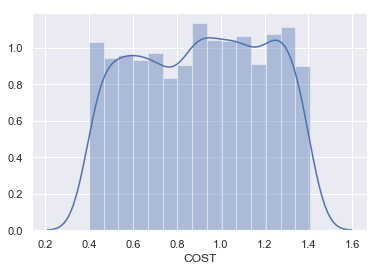

In [32]:
sns.distplot(data['COST'])

In [33]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_SPOOL * SPOOL + BETA_CABLE * CABLE +\
     BETA_COST * COST
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('COST model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('COST model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.682713,0.192096,-8.759768,0.000000,0.192364,-8.747532,0.000000
BETA_AFRICAN,0.447563,0.184810,2.421746,0.015446,0.184981,2.419509,0.015541
BETA_CABLE,0.324014,0.106872,3.031806,0.002431,0.107741,3.007354,0.002635
BETA_COST,-0.322897,0.179365,-1.800228,0.071825,0.181174,-1.782246,0.074709
BETA_NEIGHB,0.446894,0.118539,3.770003,0.000163,0.118146,3.782540,0.000155
BETA_POPDENSE,-0.426250,0.209552,-2.034099,0.041942,0.208746,-2.041955,0.041156
BETA_PTRANSP,-0.331361,0.127182,-2.605401,0.009177,0.127055,-2.608003,0.009107
BETA_SMARTPH,0.121623,0.053272,2.283067,0.022426,0.051363,2.367897,0.017890
BETA_SPOOL,-0.086033,0.121728,-0.706762,0.479715,0.123639,-0.695840,0.486529
BETA_WOMEN,0.083085,0.043600,1.905638,0.056697,0.041528,2.000723,0.045422


COST model rho-square:  0.3800814011363075
COST model rho-square-bar:  0.374882500088059


### INCOME CATEGORICAL

In [34]:
BETA_HINCOME = Beta('BETA_HINCOME', 0, None, None, 0)
BETA_MINCOME = Beta('BETA_MINCOME', 0, None, None, 0)

In [35]:
V1 = ASC_YES + BETA_HINCOME * HIGH_INCOME + BETA_MINCOME * MEDIUM_INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_SPOOL * SPOOL + BETA_CABLE * CABLE +\
     BETA_COST * COST
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('INCOME CATEGORICAL model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('INCOME CATEGORICAL model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.810972,0.199653,-9.070595,0.000000,0.200717,-9.022528,0.000000
BETA_AFRICAN,0.445105,0.185244,2.402803,0.016270,0.184935,2.406815,0.016092
BETA_CABLE,0.207648,0.118154,1.757432,0.078844,0.118665,1.749867,0.080141
BETA_COST,-0.322990,0.179699,-1.797393,0.072273,0.181468,-1.779876,0.075096
BETA_HINCOME,0.321358,0.169326,1.897870,0.057713,0.168473,1.907471,0.056460
BETA_MINCOME,0.327306,0.128268,2.551730,0.010719,0.128403,2.549059,0.010801
BETA_NEIGHB,0.450799,0.118890,3.791738,0.000150,0.118248,3.812302,0.000138
BETA_POPDENSE,-0.411805,0.210052,-1.960491,0.049938,0.209363,-1.966941,0.049190
BETA_PTRANSP,-0.327814,0.127317,-2.574791,0.010030,0.127299,-2.575140,0.010020
BETA_SMARTPH,0.124131,0.053329,2.327657,0.019930,0.051288,2.420282,0.015508


INCOME CATEGORICAL model rho-square:  0.3818757531968041
INCOME CATEGORICAL model rho-square-bar:  0.37563707193890594


## Has child

In [36]:
HCHILD = DefineVariable('HCHILD', (NCHILD >= 1), database)
BETA_HCHILD = Beta('BETA_HCHILD', 0, None, None, 0)

In [37]:
V1 = ASC_YES + BETA_HINCOME * HIGH_INCOME + BETA_MINCOME * MEDIUM_INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_SPOOL * SPOOL + BETA_CABLE * CABLE +\
     BETA_COST * COST + BETA_HCHILD * HCHILD
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('INCOME CATEGORICAL model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('INCOME CATEGORICAL model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.777062,0.201209,-8.831920,0.000000,0.202316,-8.783598,0.000000
BETA_AFRICAN,0.434130,0.185411,2.341448,0.019209,0.185399,2.341598,0.019201
BETA_CABLE,0.212796,0.118181,1.800599,0.071766,0.118561,1.794825,0.072682
BETA_COST,-0.323578,0.179827,-1.799388,0.071957,0.181595,-1.781869,0.074771
BETA_HCHILD,-0.147001,0.115251,-1.275479,0.202140,0.113770,-1.292086,0.196327
BETA_HINCOME,0.319155,0.169344,1.884660,0.059476,0.168738,1.891421,0.058568
BETA_MINCOME,0.331769,0.128350,2.584868,0.009742,0.128526,2.581339,0.009842
BETA_NEIGHB,0.456484,0.119018,3.835432,0.000125,0.118320,3.858061,0.000114
BETA_POPDENSE,-0.409704,0.210102,-1.950026,0.051173,0.209555,-1.955115,0.050569
BETA_PTRANSP,-0.329416,0.127347,-2.586767,0.009688,0.127409,-2.585501,0.009724


INCOME CATEGORICAL model rho-square:  0.38230011672664754
INCOME CATEGORICAL model rho-square-bar:  0.3755415453639246


### Interaction WALKBIKE - NBIKES

In [38]:
BETA_WBIKES_NBIKES = Beta('BETA_WBIKES_NBIKES', 0, None, None, 0)
V1 = ASC_YES + BETA_HINCOME * HIGH_INCOME + BETA_MINCOME * MEDIUM_INCOME + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_CABLE * CABLE +\
     BETA_COST * COST + BETA_WBIKES_NBIKES * WALKBIKE * NBIKES + BETA_HCHILD * HCHILD
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
print('WBIKES - NBIKES model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('WBIKES - NBIKES model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.781525,0.200996,-8.863494,0.000000,0.202368,-8.803373,0.000000
BETA_AFRICAN,0.432344,0.185261,2.333697,0.019612,0.185628,2.329091,0.019854
BETA_CABLE,0.212713,0.118232,1.799114,0.072001,0.118650,1.792767,0.073010
BETA_COST,-0.319695,0.179990,-1.776183,0.075703,0.181988,-1.756679,0.078973
BETA_HCHILD,-0.160795,0.115583,-1.391166,0.164175,0.113843,-1.412429,0.157824
BETA_HINCOME,0.239098,0.159468,1.499346,0.133784,0.160404,1.490594,0.136068
BETA_MINCOME,0.289098,0.125064,2.311608,0.020799,0.124989,2.312986,0.020723
BETA_NEIGHB,0.446717,0.119243,3.746265,0.000179,0.118206,3.779152,0.000157
BETA_POPDENSE,-0.405033,0.210260,-1.926340,0.054062,0.209970,-1.929001,0.053731
BETA_PTRANSP,-0.344028,0.127632,-2.695466,0.007029,0.127308,-2.702315,0.006886


WBIKES - NBIKES model rho-square:  0.38259396745919894
WBIKES - NBIKES model rho-square-bar:  0.37583539609647587


## Interaction INCOME - COST

In [39]:
LOW_INC = DefineVariable('LOW_INC', (INCOME == 1), database)
BETA_LOWINC_COST = Beta('BETA_LOWINC_COST', 0, None, None, 0)

In [40]:
V1 = ASC_YES + BETA_WOMEN * WOMEN + BETA_AFRICAN * AFRICAN + BETA_PTRANSP * PTRANSP +\
     BETA_POPDENSE * POPDENSE + BETA_NEIGHB * NEIGHB + BETA_SMARTPH * SMARTPH + BETA_CABLE * CABLE +\
     BETA_WBIKES_NBIKES * WALKBIKE * NBIKES + BETA_LOWINC_COST * LOW_INC * COST + BETA_HCHILD * HCHILD + BETA_COST * COST
V2 = ASC_NO
V = {1: V1, 2: V2}
results = estimateLogit(V, av, CHOSEN, 'output/FinalSpec', database)
display(results.getEstimatedParameters())
results.getEstimatedParameters().to_excel('output/FinalSpecParams.xlsx')
print('WBIKES - NBIKES model rho-square: ', results.getGeneralStatistics()['Rho-square for the init. model'][0])
print('WBIKES - NBIKES model rho-square-bar: ', results.getGeneralStatistics()['Rho-square-bar for the init. model'][0])

,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.603652,0.193434,-8.290430,2.220446e-16,0.194710,-8.236093,2.220446e-16
BETA_AFRICAN,0.431169,0.185308,2.326773,1.997737e-02,0.185879,2.319625,2.036116e-02
BETA_CABLE,0.199776,0.114520,1.744460,8.107895e-02,0.114794,1.740294,8.180747e-02
BETA_COST,-0.203227,0.185181,-1.097446,2.724465e-01,0.187184,-1.085706,2.776091e-01
BETA_HCHILD,-0.161121,0.115556,-1.394316,1.632222e-01,0.113746,-1.416496,1.566302e-01
BETA_LOWINC_COST,-0.319020,0.127106,-2.509883,1.207711e-02,0.127766,-2.496913,1.252797e-02
BETA_NEIGHB,0.443073,0.119059,3.721465,1.980701e-04,0.118014,3.754394,1.737615e-04
BETA_POPDENSE,-0.403432,0.210376,-1.917669,5.515300e-02,0.210120,-1.920012,5.485635e-02
BETA_PTRANSP,-0.347248,0.127642,-2.720483,6.518669e-03,0.127376,-2.726169,6.407416e-03
BETA_SMARTPH,0.131130,0.054878,2.389468,1.687278e-02,0.052966,2.475754,1.329551e-02


WBIKES - NBIKES model rho-square:  0.3828256919736177
WBIKES - NBIKES model rho-square-bar:  0.37658701071571954


In [41]:
stats = pd.DataFrame(results.getGeneralStatistics()).T
params = results.getEstimatedParameters()
corr = results.getCorrelationResults()
display(stats)
display(params)
display(corr)

,0,1
Number of estimated parameters,12,
Sample size,2775,
Excluded observations,0,
Init log likelihood,-1923.48,.7g
Final log likelihood,-1187.12,.7g
Likelihood ratio test for the init. model,1472.72,.7g
Rho-square for the init. model,0.382826,.3g
Rho-square-bar for the init. model,0.376587,.3g
Akaike Information Criterion,2398.25,.7g
Bayesian Information Criterion,2469.39,.7g


,Value,Std err,t-test,p-value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_YES,-1.603652,0.193434,-8.290430,2.220446e-16,0.194710,-8.236093,2.220446e-16
BETA_AFRICAN,0.431169,0.185308,2.326773,1.997737e-02,0.185879,2.319625,2.036116e-02
BETA_CABLE,0.199776,0.114520,1.744460,8.107895e-02,0.114794,1.740294,8.180747e-02
BETA_COST,-0.203227,0.185181,-1.097446,2.724465e-01,0.187184,-1.085706,2.776091e-01
BETA_HCHILD,-0.161121,0.115556,-1.394316,1.632222e-01,0.113746,-1.416496,1.566302e-01
BETA_LOWINC_COST,-0.319020,0.127106,-2.509883,1.207711e-02,0.127766,-2.496913,1.252797e-02
BETA_NEIGHB,0.443073,0.119059,3.721465,1.980701e-04,0.118014,3.754394,1.737615e-04
BETA_POPDENSE,-0.403432,0.210376,-1.917669,5.515300e-02,0.210120,-1.920012,5.485635e-02
BETA_PTRANSP,-0.347248,0.127642,-2.720483,6.518669e-03,0.127376,-2.726169,6.407416e-03
BETA_SMARTPH,0.131130,0.054878,2.389468,1.687278e-02,0.052966,2.475754,1.329551e-02


,Covariance,Correlation,t-test,p-value,Rob. cov.,Rob. corr.,Rob. t-test,Rob. p-value
BETA_AFRICAN-ASC_YES,-0.004289,-0.119663,7.179190,7.012169e-13,-0.004084,-0.112847,7.165954,7.724932e-13
BETA_CABLE-ASC_YES,-0.005352,-0.241601,7.287805,3.150813e-13,-0.005878,-0.262993,7.193797,6.301626e-13
BETA_CABLE-BETA_AFRICAN,-0.000231,-0.010867,-1.057096,2.904679e-01,0.000066,0.003098,-1.060628,2.888588e-01
BETA_COST-ASC_YES,-0.027187,-0.758980,3.943955,8.014866e-05,-0.027299,-0.749008,3.921246,8.809224e-05
BETA_COST-BETA_AFRICAN,0.000553,0.016129,-2.441353,1.463236e-02,-0.000641,-0.018435,-2.383001,1.717213e-02
BETA_COST-BETA_CABLE,-0.002858,-0.134764,-1.748505,8.037664e-02,-0.002733,-0.127209,-1.739370,8.196970e-02
BETA_HCHILD-ASC_YES,-0.003221,-0.144121,6.030847,1.631023e-09,-0.003549,-0.160264,5.992403,2.067625e-09
BETA_HCHILD-BETA_AFRICAN,0.000971,0.045346,-2.769101,5.621122e-03,0.001623,0.076750,-2.815847,4.864883e-03
BETA_HCHILD-BETA_CABLE,-0.000313,-0.023639,-2.192550,2.833980e-02,0.000293,0.022425,-2.258682,2.390319e-02
BETA_HCHILD-BETA_COST,0.000002,0.000099,0.192905,8.470330e-01,-0.000742,-0.034869,0.189324,8.498393e-01


In [42]:
import biogeme.results as res
const_results = res.bioResults ( pickleFile ='output/Estimate_Base_Share_Market.pickle')
LL_C = const_results.data.logLike
rho_square_const = 1 - (results.data.logLike) / (LL_C)
rho_square_bar_const = 1 - (results.data.logLike - 8) / (LL_C - 1)
print("Rho square for the constant model", rho_square_const)
print("Rho square bar for the constant model", rho_square_bar_const)

Rho square for the constant model 0.027014013170414297
Rho square bar for the constant model 0.021259278443060414
